<a href="https://colab.research.google.com/github/polis-community/red-dwarf/blob/main/docs/notebooks/alternative-algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet red-dwarf[all]@git+https://github.com/polis-community/red-dwarf.git@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.4 MB/s eta 0:00:00


In [2]:
from reddwarf.data_loader import Loader

REPORT_ID = "r8hk9vpmjkkhdchepj2dj"

loader = Loader(polis_id=REPORT_ID, data_source="csv_export")
print(f"Loaded data from https://pol.is/report/{REPORT_ID}")

loader.votes_data[:3]

/usr/local/lib/python3.11/dist-packages/reddwarf/data_loader.py:130: UserWarning: CSV import is missing is_meta field. Attempting to load comments data from API instead...
  warnings.warn("CSV import is missing is_meta field. Attempting to load comments data from API instead...")


Loaded data from https://pol.is/report/r8hk9vpmjkkhdchepj2dj


[{'participant_id': 65,
  'statement_id': 24,
  'vote': 1,
  'weight_x_32767': None,
  'modified': 1750326980000.0,
  'conversation_id': None,
  'datetime': 'Thu Jun 19 2025 09:56:20 GMT+0000 (Coordinated Universal Time)'},
 {'participant_id': 65,
  'statement_id': 27,
  'vote': -1,
  'weight_x_32767': None,
  'modified': 1750326947000.0,
  'conversation_id': None,
  'datetime': 'Thu Jun 19 2025 09:55:47 GMT+0000 (Coordinated Universal Time)'},
 {'participant_id': 6,
  'statement_id': 42,
  'vote': 1,
  'weight_x_32767': None,
  'modified': 1750248687000.0,
  'conversation_id': None,
  'datetime': 'Wed Jun 18 2025 12:11:27 GMT+0000 (Coordinated Universal Time)'}]

In [3]:
from reddwarf.utils.statements import process_statements

_, _, mod_out_statement_ids, meta_statement_ids = process_statements(
    statement_data=loader.comments_data,
)

In [18]:
from reddwarf.implementations.base import run_pipeline

def run_and_plot(reducer, clusterer, reducer_kwargs = {}, clusterer_kwargs = {}, presenter_kwargs = {}):
  result = run_pipeline(
      reducer=reducer,
      reducer_kwargs=reducer_kwargs,
      clusterer=clusterer,
      clusterer_kwargs=clusterer_kwargs,
      votes=loader.votes_data,
      mod_out_statement_ids=mod_out_statement_ids,
      meta_statement_ids=meta_statement_ids,
  )

  # Generate plot
  from reddwarf.data_presenter import generate_figure_polis
  generate_figure_polis(result=result, **presenter_kwargs)

Compare with https://pol.is/6actc48hc7
Calculating convex hulls around clusters...
Hull 0, bounding 18 points
Hull 1, bounding 31 points


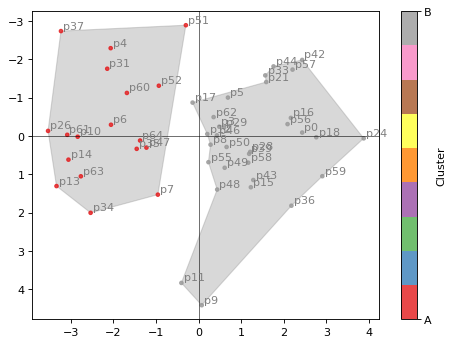

In [19]:
# Classic polis
print("Compare with https://pol.is/6actc48hc7")
run_and_plot("pca", "kmeans", presenter_kwargs={"flip_x": False, "flip_y": True})

Calculating convex hulls around clusters...
Hull 0, bounding 28 points
Hull 1, bounding 11 points


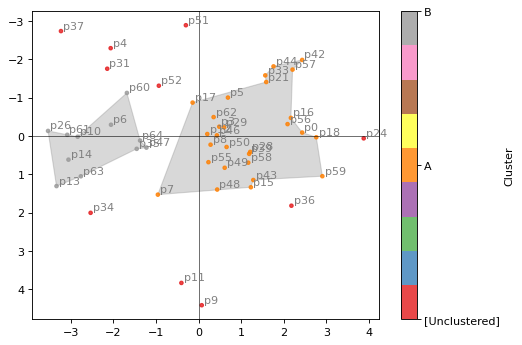

In [20]:
# Classic polis with hdbscan density-based clustering
run_and_plot("pca", "hdbscan", presenter_kwargs={"flip_x": False, "flip_y": True})

Calculating convex hulls around clusters...
Hull 0, bounding 20 points
Hull 1, bounding 20 points


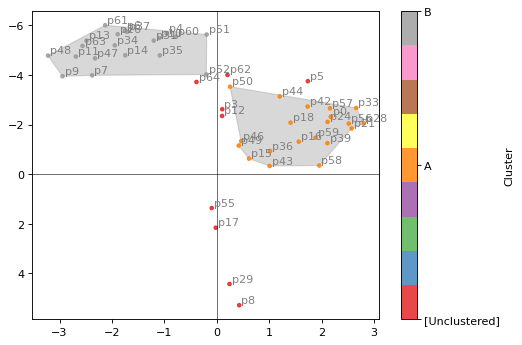

In [21]:
# Polis pipeline with default pacmap for dimensional reduction (default: n_neighbors = 10), and density-based clustering
run_and_plot("pacmap", "hdbscan", presenter_kwargs={"flip_x": False, "flip_y": True})

Calculating convex hulls around clusters...
Hull 0, bounding 15 points
Hull 1, bounding 10 points
Hull 2, bounding 9 points
Hull 3, bounding 5 points


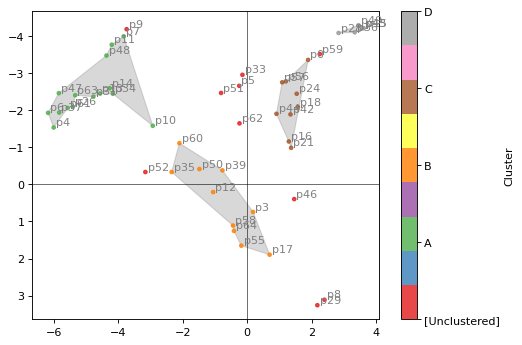

In [25]:
# Polis pipeline with pacmap for dimensional reduction, and custom n_neighbors passed in
run_and_plot("pacmap", "hdbscan", reducer_kwargs={ "n_neighbors": 5 }, presenter_kwargs={"flip_x": False, "flip_y": True})

Calculating convex hulls around clusters...
Hull 0, bounding 27 points
Hull 1, bounding 20 points


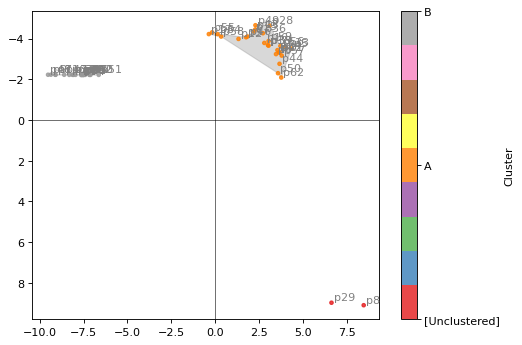

In [26]:
# Polis pipeline with localmap for dimensional reduction (default: n_neighbors = 10)
run_and_plot("localmap", "hdbscan", presenter_kwargs={"flip_x": False, "flip_y": True})

Calculating convex hulls around clusters...
Hull 0, bounding 15 points
Hull 1, bounding 13 points
Hull 2, bounding 13 points
Hull 3, bounding 6 points


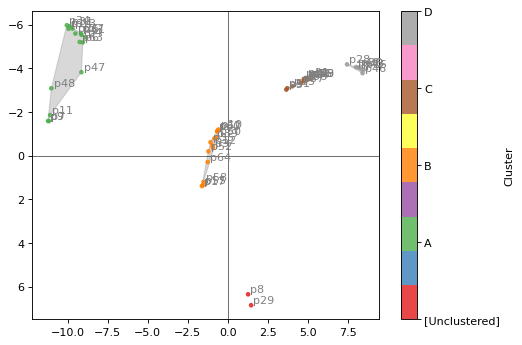

In [29]:
# Polis pipeline with localmap for dimensional reduction, and custom n_neighbors passed in
run_and_plot("localmap", "hdbscan", reducer_kwargs={ "n_neighbors": 5 }, presenter_kwargs={"flip_x": False, "flip_y": True})